In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, 
                                                            postgres_host, postgres_port, postgres_db))
data = pd.read_sql_query('select * from studentsperformance', con=engine)
engine.dispose()

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [79]:
# question1
# respect to gender

print(data.groupby('gender')[['math score', 'reading score', 'writing score']].mean())
print(stats.ttest_ind(data[data['gender']=='female'][['math score', 'reading score', 'writing score']], 
                data[data['gender']=='male'][['math score', 'reading score', 'writing score']]))

# respect to ethnicities
print(data.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean())
e = data['race/ethnicity'].unique()
for var in ['math score', 'reading score', 'writing score']:
    for i in range(len(x)):
        for j in range(i+1, len(e)):
            print(stats.ttest_ind(data[data['race/ethnicity']==e[i]][var],
                 data[data['race/ethnicity']==e[j]][var]))

# respect to parental level of education
print(data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean())
p = data['parental level of education'].unique()
for var in ['math score', 'reading score', 'writing score']:
    for i in range(len(p)):
        for j in range(i+1, len(p)):
            print(stats.ttest_ind(data[data['parental level of education']==p[i]][var],
                                 data[data['parental level of education']==p[j]][var]))
            

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203
Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))
                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
Ttest_indResult(statistic=-6.007397050552227, 

In [86]:
data['lunch'].unique()
print(data.groupby('lunch')[['math score', 'reading score', 'writing score']].mean())

# students who get free/reduced get a lower average score

              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


In [87]:
print(data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean())

# student who did a test preparation have a higher average score

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


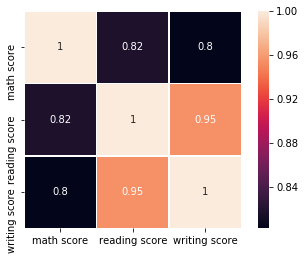

In [93]:
corr = data[['math score', 'reading score', 'writing score']].corr()

sns.heatmap(corr, square=True, annot=True, linewidths=.5)
# reading and writing are the most correlated subjects